# Sustainable Fashion Project

### 🛍️ Shopping behavior might seem lighthearted, but understanding it is essential for businesses, logistics, marketing strategies, and even environmental impact.

In this project, we analyze **synthetically generated customer data** that simulates real-world purchasing behavior. This dataset includes insights such as:

* Customer segmentation (New, Loyal, VIP)
* Seasonal shopping trends (e.g., Christmas, Back to school)
* Delivery time expectations
* Number of items purchased

This data allows us to explore key business questions such as:

* 🧠 How do different customer segments behave when shopping?
* 📦 Are VIP customers more likely to order more items or expect faster delivery?
* 🕐 Does the season affect the number of items purchased or delivery times?
* 📊 How can businesses optimize marketing and logistics based on seasonal trends?

This simplified dataset gives us a chance to practice cluster analysis, customer profiling, and visualization techniques that can help businesses make **data-driven decisions**.

To begin with, I synthetically created the dataset.

In [1]:
import pandas as pd
import random

customer_ids = range(1, 3901)
customer_segmentation = [random.choice(["New", "Loyal", "VIP"]) for _ in customer_ids]
seasonal_trends = [random.choice(["Christmas present", "Back to school", "Summer preperation", "Pre-fall shopping"]) for _ in customer_ids]
delivery_time = [random.randint(2, 30) for _ in customer_ids]
number_of_items_purchased = [random.randint(1, 9) for _ in customer_ids]

data = {
    'Customer ID': customer_ids,
    'Customer Segmentation': customer_segmentation,
    'Seasonal Trends': seasonal_trends,
    'Delivery Time': delivery_time,
    'Number of Items Purchased': number_of_items_purchased
}

df = pd.DataFrame(data)

df.to_csv('data/customer_data.csv', index=False)

So, now I can open file `customer_data.csv`:

In [2]:
df_created = pd.read_csv("data/customer_data.csv")
df_created

,Customer ID,Customer Segmentation,Seasonal Trends,Delivery Time,Number of Items Purchased
0,1,New,Back to school,23,8
1,2,Loyal,Back to school,8,8
2,3,New,Summer preperation,7,8
3,4,New,Christmas present,25,4
4,5,VIP,Pre-fall shopping,26,6
...,...,...,...,...,...
3895,3896,Loyal,Christmas present,16,7
3896,3897,New,Christmas present,14,2
3897,3898,VIP,Christmas present,15,6
3898,3899,Loyal,Christmas present,27,2


Top 10 lines:

In [3]:
df = pd.read_csv('data/shopping_trends.csv')
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


Delete "Subscription Status" column:

In [4]:
df = df.drop(['Subscription Status'], axis=1)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,PayPal,Express,No,No,24,Venmo,Weekly


Now, I will merge two datasets to get the final result:

In [5]:
df = pd.merge(df, df_created, how='inner', on='Customer ID')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Customer Segmentation,Seasonal Trends,Delivery Time,Number of Items Purchased
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,New,Back to school,23,8
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,Loyal,Back to school,8,8
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,New,Summer preperation,7,8
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,New,Christmas present,25,4
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,VIP,Pre-fall shopping,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,2-Day Shipping,No,No,32,Venmo,Weekly,Loyal,Christmas present,16,7
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,New,Christmas present,14,2
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Standard,No,No,24,Venmo,Quarterly,VIP,Christmas present,15,6
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,Express,No,No,24,Venmo,Weekly,Loyal,Christmas present,27,2


I will delete unnecessary for me columns:

In [6]:
df = df.drop(['Discount Applied', 'Promo Code Used'], axis=1)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Customer Segmentation,Seasonal Trends,Delivery Time,Number of Items Purchased
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Credit Card,Express,14,Venmo,Fortnightly,New,Back to school,23,8
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Bank Transfer,Express,2,Cash,Fortnightly,Loyal,Back to school,8,8
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Cash,Free Shipping,23,Credit Card,Weekly,New,Summer preperation,7,8
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,PayPal,Next Day Air,49,PayPal,Weekly,New,Christmas present,25,4
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Cash,Free Shipping,31,PayPal,Annually,VIP,Pre-fall shopping,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,Cash,2-Day Shipping,32,Venmo,Weekly,Loyal,Christmas present,16,7
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,PayPal,Store Pickup,41,Bank Transfer,Bi-Weekly,New,Christmas present,14,2
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Credit Card,Standard,24,Venmo,Quarterly,VIP,Christmas present,15,6
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,PayPal,Express,24,Venmo,Weekly,Loyal,Christmas present,27,2


### Visualization

#### So, I create a simple pie chart showing the gender distribution.

In [7]:
import matplotlib.pyplot as plt

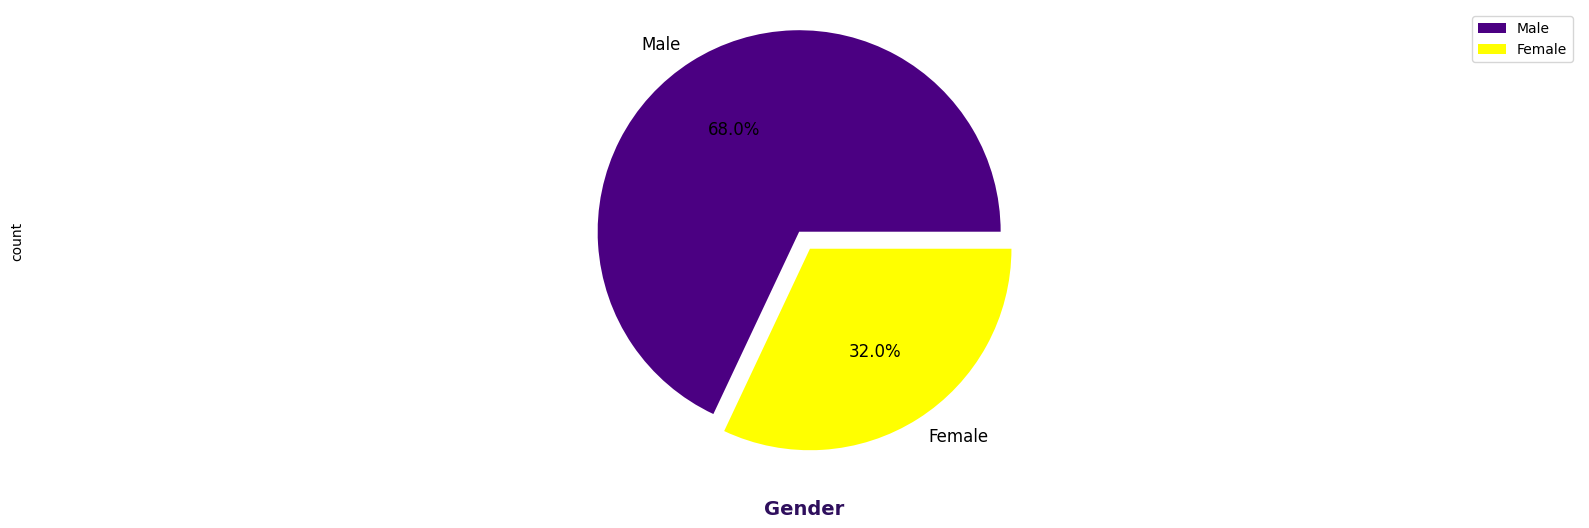

In [34]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = ['indigo', 'yellow'], explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

#### And also a bar chart for the same purpose.

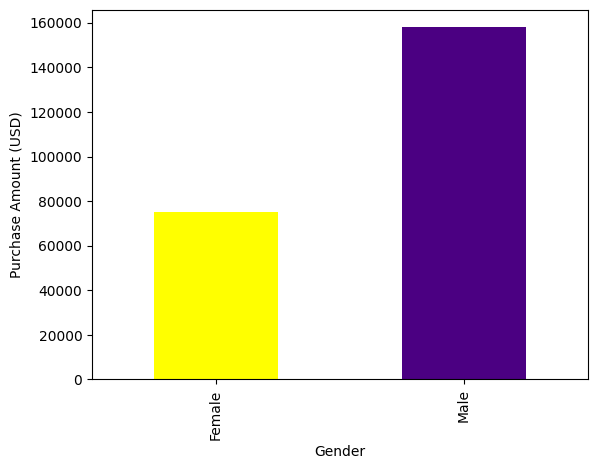

In [35]:
df_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()

df_by_gender.plot(kind='bar', color=['yellow', 'indigo'])
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

#### I create a horizontal bar chart displaying the purchase amount for each category in USD.

In [36]:
category = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

Text(0.5, 1.0, 'Purchase Amount for each category (USD)')

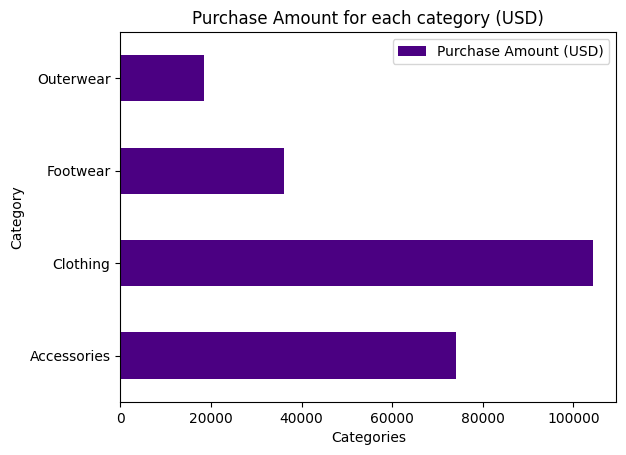

In [37]:
category.set_index('Category').plot(kind='barh', color='indigo')
plt.xlabel('Categories')
plt.title('Purchase Amount for each category (USD)') 

For the next visualization, at first, I need to create a new DataFrame listing all unique clothing items purchased, sort them alphabetically, and reset the index for a clean display.


In [12]:
items = pd.DataFrame(df['Item Purchased'].unique(), columns=['Clothes'])
items = items.sort_values(by='Clothes')
items.index = range(0, len(items)) 
items

,Clothes
0,Backpack
1,Belt
2,Blouse
3,Boots
4,Coat
5,Dress
6,Gloves
7,Handbag
8,Hat
9,Hoodie


#### In this code I grouped the data by purchased item, sumed the total purchase amount for each, and created a vertical bar chart to show how much revenue each item generated in USD.


Text(0.5, 1.0, 'Purchase Amount for each item (USD)')

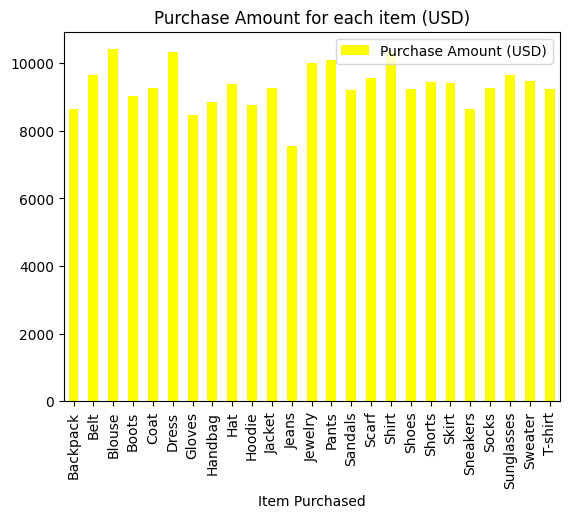

In [13]:
items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
items.set_index('Item Purchased').plot(kind='bar', color='yellow')
plt.xlabel('Item Purchased')
plt.title('Purchase Amount for each item (USD)')

#### Here I created a bar chart showing the top 10 most frequent customer locations. 

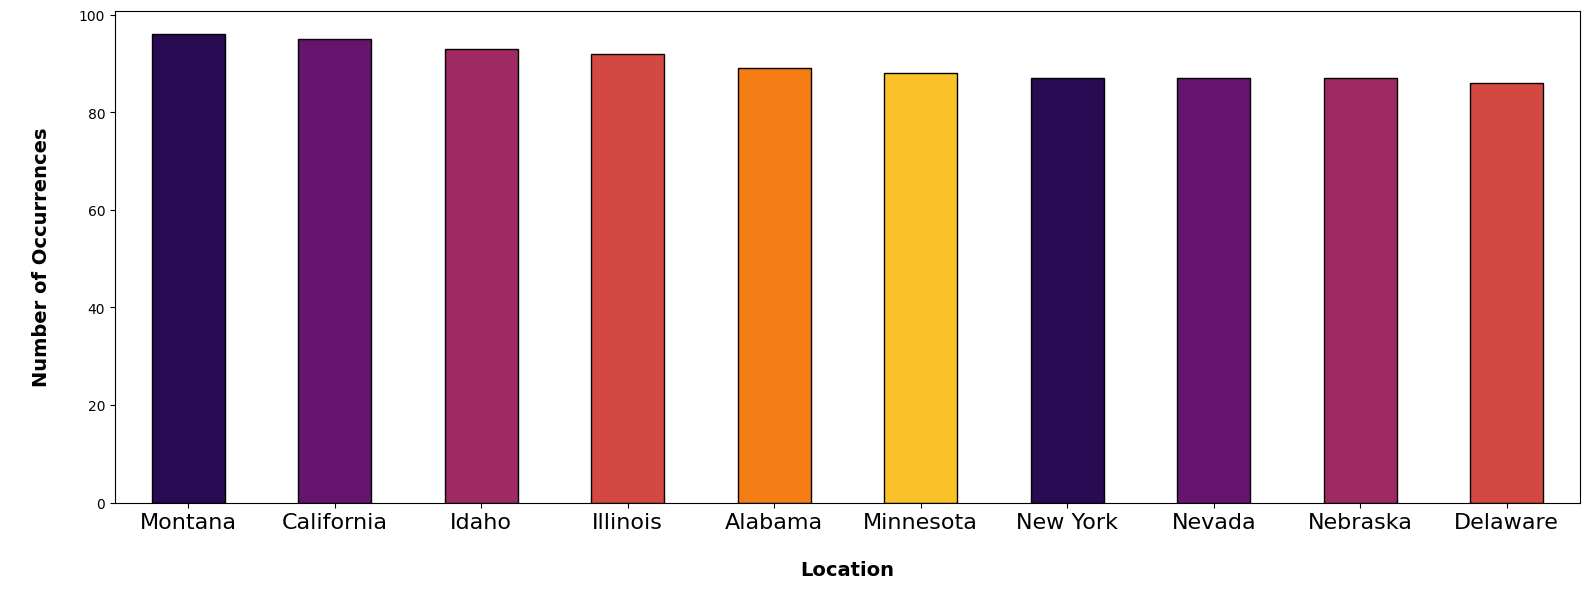

In [14]:
import seaborn as sns
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "black", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = 'black', fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

#### The next visualization is a bar chart displaying the distribution of clothing sizes.

In [15]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

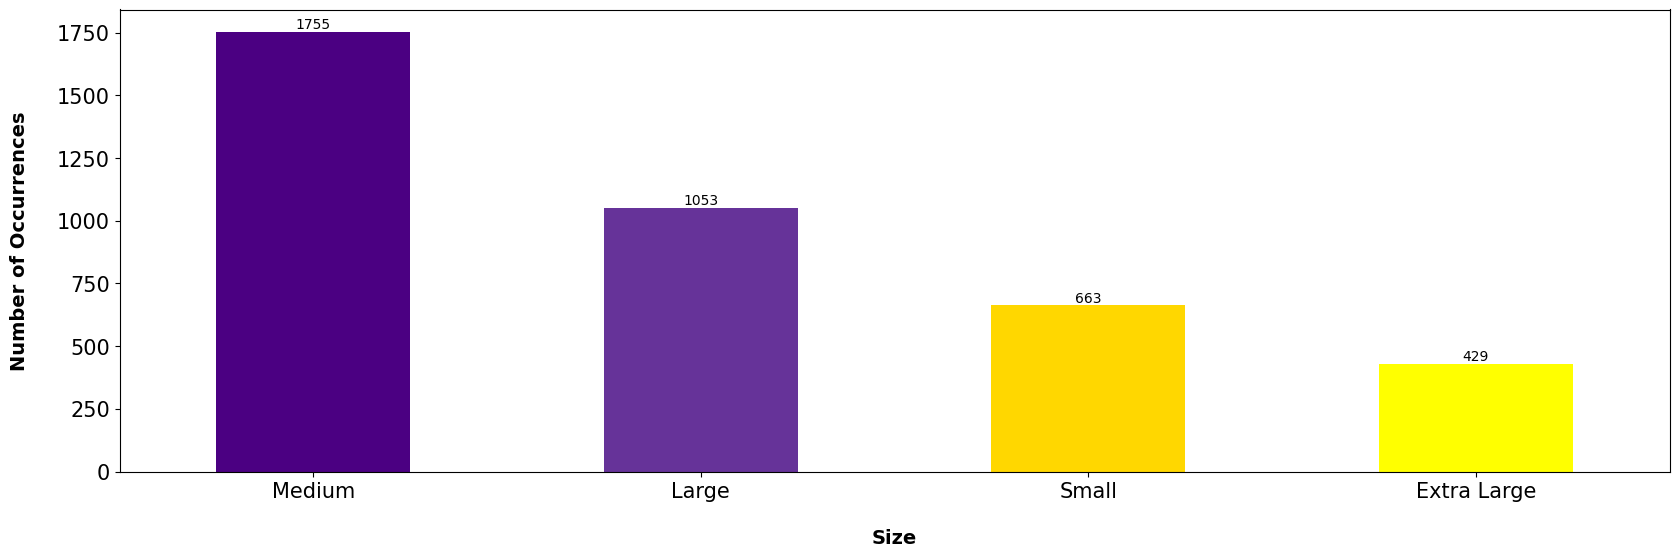

In [16]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = ['indigo', 'rebeccapurple', 'gold', 'yellow'], rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "black", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "black", fontsize = 14, labelpad = 20);

#### Here I created a grouped bar chart comparing the total purchase amounts by gender across clothing categories. 

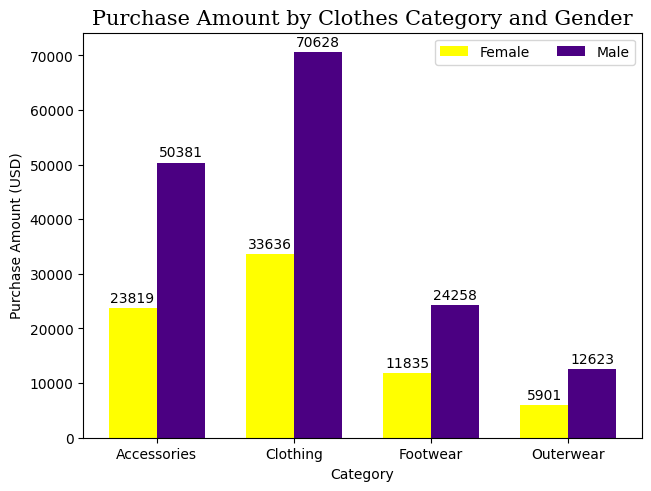

In [20]:
import numpy as np

grouped_df = df.groupby(['Category', 'Gender']).sum().reset_index()

male_data = grouped_df[grouped_df['Gender'] == 'Male']['Purchase Amount (USD)']
female_data = grouped_df[grouped_df['Gender'] == 'Female']['Purchase Amount (USD)']

width = 0.35

x = np.arange(len(grouped_df['Category'].unique()))

fig, ax = plt.subplots(layout='constrained')
bar1 = ax.bar(x, female_data, width, label='Female', color='yellow')
bar2 = ax.bar(x + width, male_data, width, label='Male', color='indigo')

font2 = {'family':'serif','color':'black','size':15}

ax.set_xlabel('Category')
ax.set_ylabel('Purchase Amount (USD)')
ax.set_title('Purchase Amount by Clothes Category and Gender', fontdict = font2)
ax.set_xticks(x + width / 2)
ax.set_xticklabels(grouped_df['Category'].unique())
ax.legend(loc='upper right', ncols=3)


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
add_labels(bar1)
add_labels(bar2)

plt.show()

In [21]:
df.head(100)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Customer Segmentation,Seasonal Trends,Delivery Time,Number of Items Purchased
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Credit Card,Express,14,Venmo,Fortnightly,New,Back to school,23,8
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Bank Transfer,Express,2,Cash,Fortnightly,Loyal,Back to school,8,8
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Cash,Free Shipping,23,Credit Card,Weekly,New,Summer preperation,7,8
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,PayPal,Next Day Air,49,PayPal,Weekly,New,Christmas present,25,4
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Cash,Free Shipping,31,PayPal,Annually,VIP,Pre-fall shopping,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,PayPal,Free Shipping,48,PayPal,Monthly,Loyal,Summer preperation,19,1
96,97,32,Male,Gloves,Accessories,73,Delaware,S,Gold,Spring,3.6,Venmo,Express,43,Venmo,Every 3 Months,VIP,Pre-fall shopping,9,6
97,98,21,Male,Shoes,Footwear,92,Virginia,M,Teal,Winter,4.8,PayPal,Store Pickup,37,Cash,Annually,VIP,Pre-fall shopping,17,6
98,99,20,Male,Jeans,Clothing,67,New York,XL,Teal,Spring,2.6,Cash,Next Day Air,20,Bank Transfer,Annually,New,Back to school,16,8


#### I generated a scatter plot showing the relationship between the number of items purchased and review ratings.

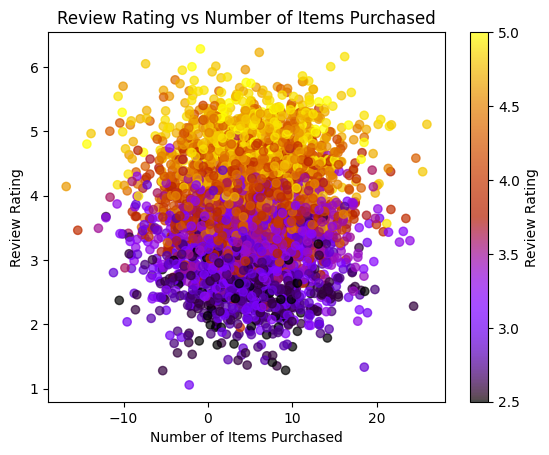

In [22]:
plt.scatter(df['Number of Items Purchased'] + np.random.normal(0, 5, size=len(df)),
            df['Review Rating'] + np.random.normal(0, 0.5, size=len(df)),
            c=df['Review Rating'], cmap='gnuplot', alpha=0.7)

plt.colorbar(label='Review Rating')

plt.xlabel('Number of Items Purchased')
plt.ylabel('Review Rating')
plt.title('Review Rating vs Number of Items Purchased')

plt.show()

#### I created a line plot that visualizes how often customers make purchases. For that, I created a special dataset.

In [23]:
frequency_counts = df['Frequency of Purchases'].value_counts()
frequency = pd.DataFrame({'Frequency of Purchases': frequency_counts.index, 'Count': frequency_counts.values})
frequency = frequency.sort_values(by='Frequency of Purchases')
frequency.index = range(len(frequency))

frequency

,Frequency of Purchases,Count
0,Annually,572
1,Bi-Weekly,547
2,Every 3 Months,584
3,Fortnightly,542
4,Monthly,553
5,Quarterly,563
6,Weekly,539


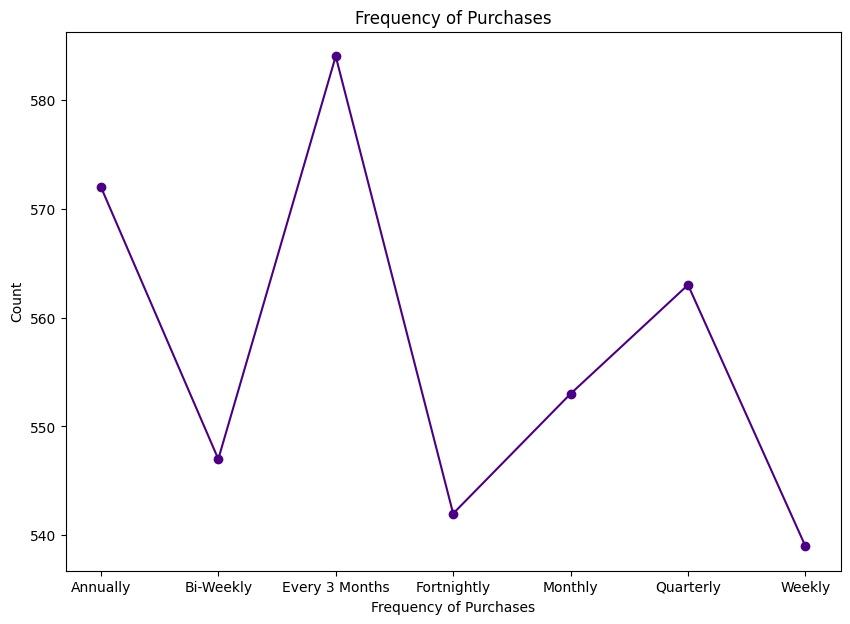

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(frequency['Frequency of Purchases'], frequency['Count'], marker='o', linestyle='-', color = 'indigo')

ax.set_xlabel('Frequency of Purchases')
ax.set_ylabel('Count')
ax.set_title('Frequency of Purchases')

plt.show()

#### I generated a grouped bar chart to compare purchase amounts across different seasons, broken down by payment method.

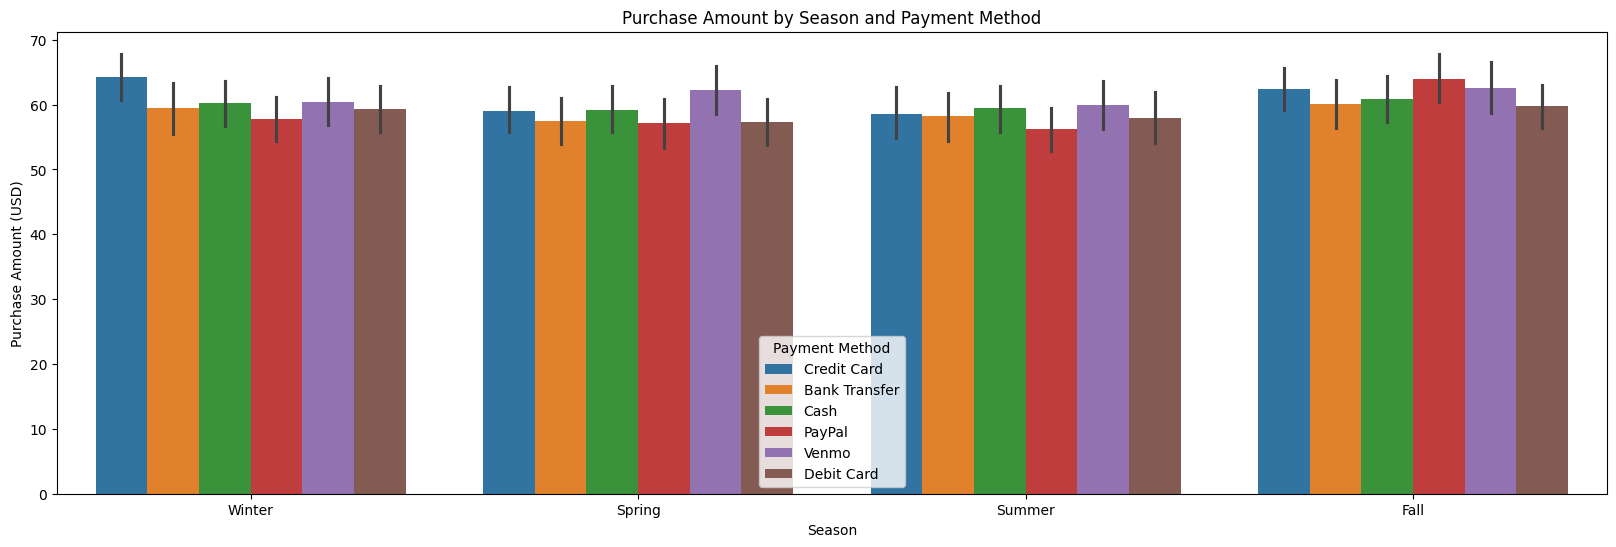

In [25]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

In [26]:
df_sorted = df.sort_values(by='Number of Items Purchased', ascending=False)
df_top = df_sorted.head(10)
df_top

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Customer Segmentation,Seasonal Trends,Delivery Time,Number of Items Purchased
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,Cash,2-Day Shipping,44,Credit Card,Every 3 Months,New,Back to school,19,9
13,14,65,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Debit Card,Express,31,PayPal,Weekly,Loyal,Back to school,14,9
3847,3848,60,Female,Sweater,Clothing,34,Delaware,S,Blue,Fall,3.2,Credit Card,2-Day Shipping,31,PayPal,Fortnightly,New,Pre-fall shopping,27,9
1743,1744,23,Male,Skirt,Clothing,72,Missouri,XL,Brown,Winter,3.3,Debit Card,Standard,3,Bank Transfer,Weekly,VIP,Back to school,29,9
1729,1730,47,Male,Shorts,Clothing,21,Illinois,M,Brown,Winter,3.8,Venmo,Store Pickup,12,Venmo,Fortnightly,Loyal,Summer preperation,25,9
3834,3835,43,Female,Hoodie,Clothing,59,Tennessee,M,Magenta,Winter,4.1,Debit Card,2-Day Shipping,17,Cash,Quarterly,VIP,Back to school,14,9
1775,1776,18,Male,Jacket,Outerwear,47,Iowa,M,Violet,Spring,3.3,Bank Transfer,2-Day Shipping,12,Cash,Bi-Weekly,Loyal,Summer preperation,15,9
1764,1765,61,Male,Dress,Clothing,56,Delaware,M,Charcoal,Summer,3.0,PayPal,Store Pickup,34,Venmo,Quarterly,New,Summer preperation,26,9
1765,1766,68,Male,Hoodie,Clothing,88,New Mexico,M,Orange,Spring,4.1,Bank Transfer,2-Day Shipping,41,Venmo,Quarterly,New,Summer preperation,13,9
1719,1720,45,Male,Sweater,Clothing,39,Maryland,M,White,Winter,3.2,Venmo,Free Shipping,8,Venmo,Quarterly,Loyal,Christmas present,15,9


#### For the next map visualization I added 3 columns.

In [27]:
new_column1 = [37.8393, 42.4072, 43.8041, 35.0078, 40.4173, 41.4925, 43.1939, 40.6331, 63.5888, 31.9686]
new_column2 = [-84.2700, -71.3824, -120.5542, -97.0929, -82.9071, -99.9018, -71.5724, -89.3985, -154.4931, -99.9018]
new_column3 = ['ID', 'CO', 'MN', 'HI', 'NH', 'MN', 'RI', 'TN', 'VA', 'WA']

df_top.loc[:, 'X'] = new_column1
df_top.loc[:, 'Y'] = new_column2
df_top.loc[:, 'Code'] = new_column3
df_top

/var/folders/jj/py4v5jf97ll0gsvytld5hmx80000gn/T/ipykernel_16028/2891086427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'X'] = new_column1
/var/folders/jj/py4v5jf97ll0gsvytld5hmx80000gn/T/ipykernel_16028/2891086427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc[:, 'Y'] = new_column2
/var/folders/jj/py4v5jf97ll0gsvytld5hmx80000gn/T/ipykernel_16028/2891086427.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Customer Segmentation,Seasonal Trends,Delivery Time,Number of Items Purchased,X,Y,Code
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,...,44,Credit Card,Every 3 Months,New,Back to school,19,9,37.8393,-84.2700,ID
13,14,65,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,...,31,PayPal,Weekly,Loyal,Back to school,14,9,42.4072,-71.3824,CO
3847,3848,60,Female,Sweater,Clothing,34,Delaware,S,Blue,Fall,...,31,PayPal,Fortnightly,New,Pre-fall shopping,27,9,43.8041,-120.5542,MN
1743,1744,23,Male,Skirt,Clothing,72,Missouri,XL,Brown,Winter,...,3,Bank Transfer,Weekly,VIP,Back to school,29,9,35.0078,-97.0929,HI
1729,1730,47,Male,Shorts,Clothing,21,Illinois,M,Brown,Winter,...,12,Venmo,Fortnightly,Loyal,Summer preperation,25,9,40.4173,-82.9071,NH
3834,3835,43,Female,Hoodie,Clothing,59,Tennessee,M,Magenta,Winter,...,17,Cash,Quarterly,VIP,Back to school,14,9,41.4925,-99.9018,MN
1775,1776,18,Male,Jacket,Outerwear,47,Iowa,M,Violet,Spring,...,12,Cash,Bi-Weekly,Loyal,Summer preperation,15,9,43.1939,-71.5724,RI
1764,1765,61,Male,Dress,Clothing,56,Delaware,M,Charcoal,Summer,...,34,Venmo,Quarterly,New,Summer preperation,26,9,40.6331,-89.3985,TN
1765,1766,68,Male,Hoodie,Clothing,88,New Mexico,M,Orange,Spring,...,41,Venmo,Quarterly,New,Summer preperation,13,9,63.5888,-154.4931,VA
1719,1720,45,Male,Sweater,Clothing,39,Maryland,M,White,Winter,...,8,Venmo,Quarterly,Loyal,Christmas present,15,9,31.9686,-99.9018,WA


In [28]:
csv_file_path = 'data/map_file.csv'

df_top.to_csv(csv_file_path, index=False)

#### Here is is...

In [29]:
import folium
m = folium.Map([37.0902, -95.7129], zoom_start=5)
items = folium.map.FeatureGroup()

for lat, lng, in zip(df_top.X, df_top.Y):
    items.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius = 5,
            color = 'yellow', 
            fill_color = 'indigo',
            fill_opacity = 0.9
        )
    )
m.add_child(items)

#### I ceated a word cloud from the "Item Purchased" column, visually highlighting the most frequently purchased items — larger words indicate higher purchase frequency.

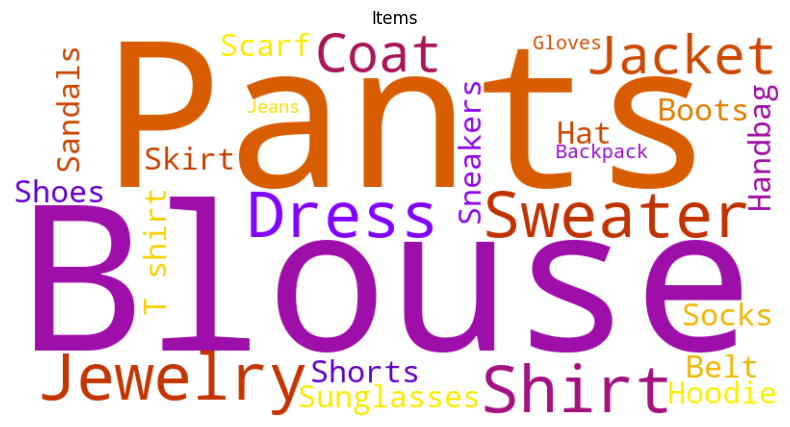

In [30]:
from wordcloud import WordCloud

text = ' '.join(df['Item Purchased'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot', max_words=None).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Items')
plt.show()

#### Here I displayed a custom-shaped mask image (`cloud_mask`) that can be used to shape a word cloud, showing it without axes for a clean visual preview.

In [31]:
import numpy as np
from PIL import Image

cloud_mask = np.array(Image.open('images/cloud.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


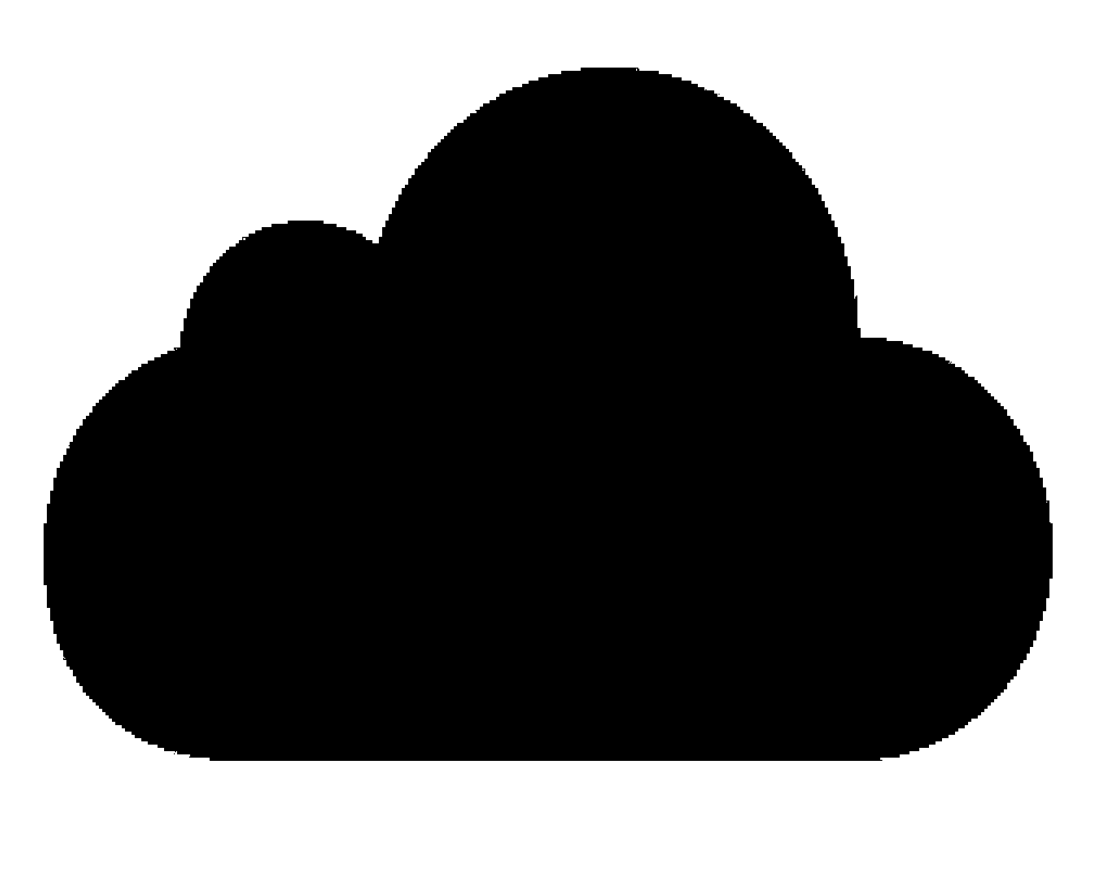

In [32]:
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(cloud_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Exactly like that...

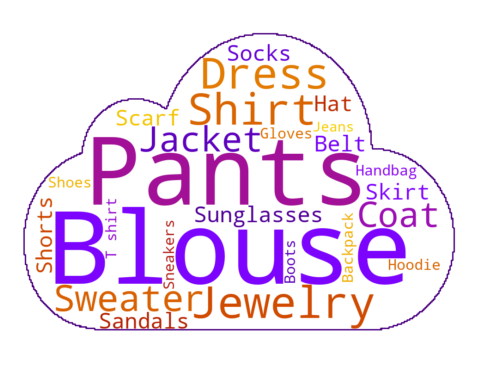

In [33]:
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='gnuplot', max_words=None, mask=cloud_mask,
                      contour_width=3, contour_color='indigo').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()